## Credit Risk Analyzer Project

### Note : -
<blockquote style="font-size:16px;color:indigo;">This project tries to analyze the data and various features present in the data. And then based on the analysis, a classification model is build. The code and the report are merged together into a single document, so as to ensure a clear understanding to whomsoever reading this document.</blockquote>

### 1. Objective

<blockquote style="font-size:16px;color:indigo;">This project aims at building a classication model to predict whether a person is going to be a defaulter or not based on various parameters like age, education and income etc. This helps the companies to perform credit risk analysis i.e possibility of the borrower's repayment failure and the loss caused to the financer when the borrower does not for any reason repay the contractual loan obligations.</blockquote>

### 2. Importing the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from copy import deepcopy
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### 3. Importing the data

In [2]:
data = pd.read_csv('D:\Simpliearn Lectures\Projects\Credit Risk Analyzer Project/credit_data.csv')
data.head(10)

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,Male,Graduate,Professional,None,None,186319,21625,Family,None,Married,0,1
1,18,Male,Under Graduate,Professional,None,None,277022,20442,Rented,None,Married,0,1
2,29,Male,Under Graduate,Salaried,None,Entry,348676,24404,Rented,None,Married,1,1
3,18,Male,Graduate,Student,None,None,165041,2533,Rented,None,Married,0,1
4,26,Male,Post Graduate,Salaried,None,Mid-level 1,348745,19321,Rented,None,Married,1,1
5,26,Female,Other,Student,None,None,404972,22861,Family,None,Single,0,1
6,28,Male,Under Graduate,Student,None,None,231185,20464,Family,None,Married,0,1
7,24,Female,Under Graduate,Salaried,None,Entry,102554,42159,Family,None,Married,1,1
8,26,Female,Under Graduate,Salaried,None,Junior,226786,19817,Family,None,Single,0,1
9,26,Male,Graduate,Salaried,None,Mid-level 1,250424,5271,Family,Two Wheeler,Married,1,1


#### 3.1 Understanding the size and dimensionality of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50636 entries, 0 to 50635
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                50636 non-null  int64 
 1   gender             50636 non-null  object
 2   education          50636 non-null  object
 3   occupation         50636 non-null  object
 4   organization_type  50636 non-null  object
 5   seniority          50636 non-null  object
 6   annual_income      50636 non-null  int64 
 7   disposable_income  50636 non-null  int64 
 8   house_type         50636 non-null  object
 9   vehicle_type       50636 non-null  object
 10  marital_status     50636 non-null  object
 11  no_card            50636 non-null  int64 
 12  default            50636 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 5.0+ MB


<blockquote style="font-size:16px;color:indigo;">
    <ul type="none">
    <li>As we can see there are no null or missing values in the dataset.</li>
    <li>The dataset contains 50,636 instances of data.</li>
        <li>And the data contains 12 features. And out of these 12 features there are 4 numerical features and 8 categorical features.</li>
    </ul>
</blockquote>

In [4]:
data.describe()

,age,annual_income,disposable_income,no_card,default
count,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000
mean,29.527411,277243.989889,18325.788569,0.509815,0.158425
std,8.816532,153838.973755,12677.864844,0.669883,0.365142
min,18.000000,50000.000000,1000.000000,0.000000,0.000000
25%,25.000000,154052.250000,8317.750000,0.000000,0.000000
50%,27.000000,258860.500000,15770.000000,0.000000,0.000000
75%,30.000000,385071.500000,24135.000000,1.000000,0.000000
max,64.000000,999844.000000,49999.000000,2.000000,1.000000


### 4. Exploratory data analysis

#### 4.1 Univariate analysis

##### 4.1.1 Age of the persons

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Plotting the distribution plot (Probability density function) of the feature 'AGE'</span>

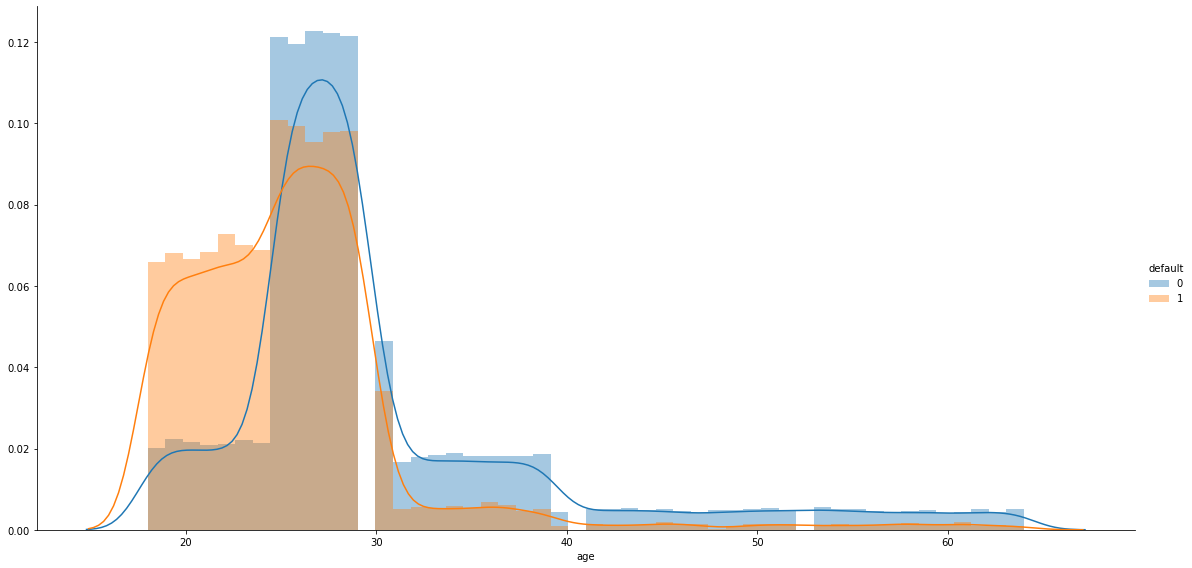

In [5]:
sns.FacetGrid(data, hue="default",height=8,aspect=2).map(sns.distplot, "age").add_legend()

<blockquote style="font-size:16px;color:maroon;">
    <ul type="none">
    <li>12% of the people in this dataset are of age between 25 -> 35 and are not defaulters.</li>
    <li>There are 10% of the people in this dataset who are of age between 25 -> 35 and are defaulters.</li>
        <li>And the people who are having age > 40 are very less in this dataset.</li>
    </ul>
</blockquote>

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Understanding the value counts of the feature 'AGE'</span>

In [6]:
age = data['age'].value_counts()
print("AGE     : Number of points where age = AGE")
print("-------------------------------------------")
for i in range(len(age)):
    print(age.index[i],"\t:",age.values[i])

AGE     : Number of points where age = AGE
-------------------------------------------
28 	: 5514
27 	: 5512
25 	: 5502
29 	: 5491
26 	: 5423
30 	: 2073
23 	: 1383
19 	: 1374
22 	: 1360
24 	: 1349
20 	: 1336
21 	: 1325
18 	: 1279
34 	: 780
39 	: 764
33 	: 761
36 	: 758
37 	: 757
35 	: 750
32 	: 745
38 	: 745
31 	: 690
53 	: 229
43 	: 220
45 	: 217
51 	: 216
41 	: 210
54 	: 209
50 	: 207
55 	: 206
64 	: 205
42 	: 204
62 	: 202
44 	: 202
59 	: 199
52 	: 199
49 	: 197
58 	: 196
56 	: 194
46 	: 189
61 	: 188
48 	: 188
57 	: 184
63 	: 181
40 	: 178
47 	: 174
60 	: 171


##### 4.1.2 Gender

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Plotting the number of male and female customers</span>

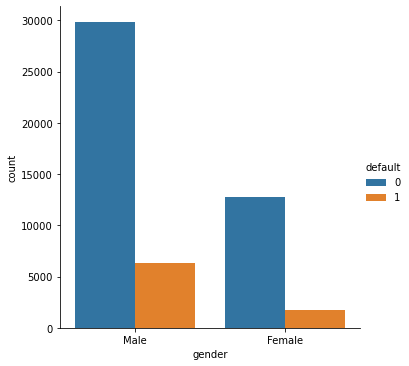

In [7]:
sns.catplot(x="gender",hue="default", kind="count", data=data)

<blockquote style="font-size:16px;color:maroon;">
    <ul type="none">
    <li>There are more number of male defaulters than the female defaulters.</li>
    </ul>
</blockquote>

#### 4.1.3 Education

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Understanding what degree does hold</span>

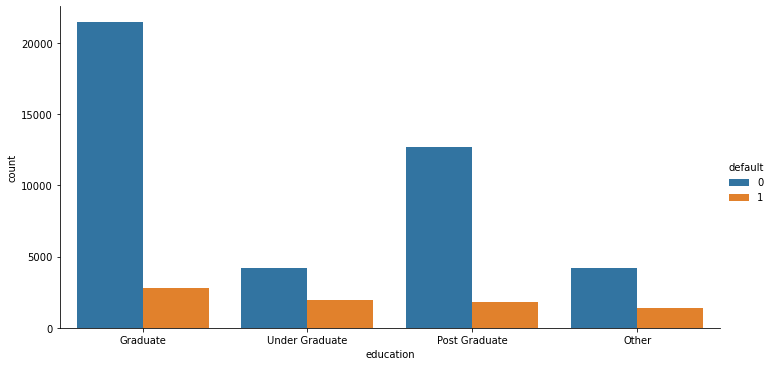

In [8]:
sns.catplot(x="education",hue="default", kind="count", data=data,aspect=2)

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Total number of Graduates,Post Graduates and Undergraduates and others </span>

In [9]:
edu = data['education'].value_counts()
print("Education       :  Count")
print("---------------------------")
for i in range(len(edu)):
    print(edu.index[i],"\t:",edu.values[i])

Education       :  Count
---------------------------
Graduate 	: 24320
Post Graduate 	: 14545
Under Graduate 	: 6189
Other 	: 5582


#### 4.1.4 Occupation

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Understanding customers occupations</span>

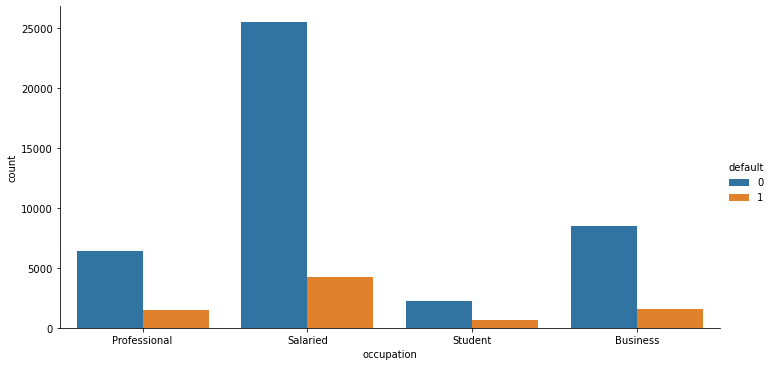

In [10]:
sns.catplot(x="occupation",hue="default", kind="count", data=data,aspect=2)

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Customers occupations</span>

In [11]:
oc = data['occupation'].value_counts()
print("Occupation       :  Count")
print("---------------------------")
for i in range(len(oc)):
    print(oc.index[i],"\t:",oc.values[i])

Occupation       :  Count
---------------------------
Salaried 	: 29738
Business 	: 10072
Professional 	: 7942
Student 	: 2884


#### 4.1.5 Organization type

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Customers organization type</span>

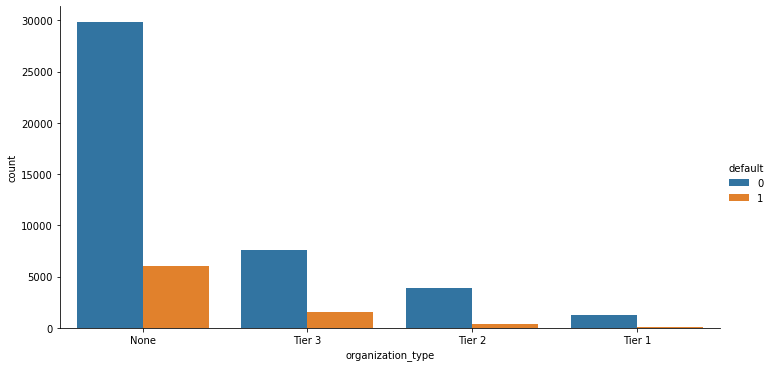

In [12]:
sns.catplot(x="organization_type",hue="default", kind="count", data=data,aspect=2)

<blockquote style="font-size:16px;color:maroon;">
    <ul type="none">
    <li>There are defaulters > 5000 who do not belong to an organization of any tier.</li>
    </ul>
</blockquote>

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Organization type counts</span>

In [13]:
org = data['organization_type'].value_counts()
print("Organization type  :  Count")
print("-----------------------------")
for i in range(len(org)):
    print(org.index[i],"\t\t   :",org.values[i])

Organization type  :  Count
-----------------------------
None 		   : 35884
Tier 3 		   : 9165
Tier 2 		   : 4226
Tier 1 		   : 1361


#### 4.1.6 Seniority

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Customers seniority in their organization</span>

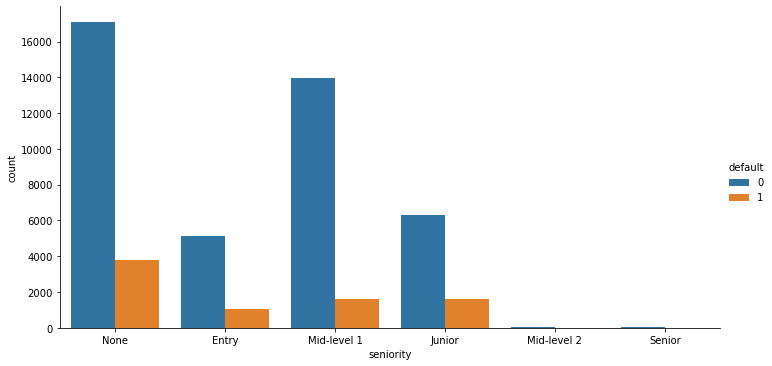

In [14]:
sns.catplot(x="seniority",hue="default", kind="count", data=data,aspect=2)

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Seniority of customers in their organization counts</span>

In [15]:
sr = data['seniority'].value_counts()
print("Seniority  :  Count")
print("----------------------")
for i in range(len(sr)):
    print(sr.index[i],":",sr.values[i])

Seniority  :  Count
----------------------
None : 20898
Mid-level 1 : 15565
Junior : 7934
Entry : 6136
Mid-level 2 : 60
Senior : 43


#### 4.1.7 Annual income

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Visualizing the distribution of the income</span>

<AxesSubplot:xlabel='annual_income', ylabel='Density'>

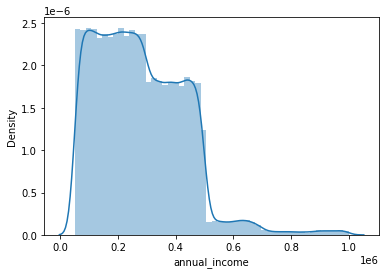

In [16]:
income = data['annual_income']
sns.distplot(income)

#### 4.1.8 Discretionary income

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Visualizing the distribution of the dispoable income. i.e income remaining after deduction of taxes and social security charges, available to be spent or saved as one wishes.
</span>

<AxesSubplot:xlabel='disposable_income', ylabel='Density'>

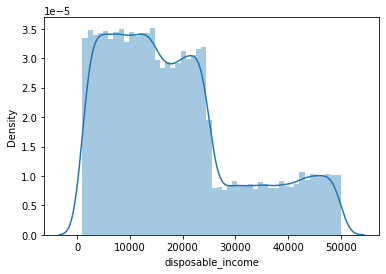

In [17]:
dis_income = data['disposable_income']
sns.distplot(dis_income)

#### 4.1.9 House type

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Customers house type</span>

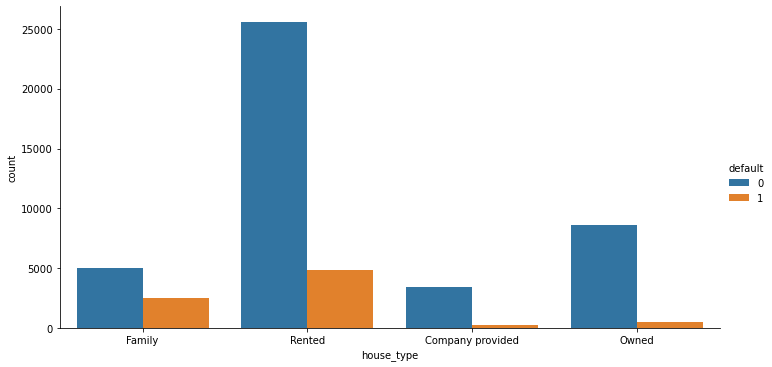

In [18]:
sns.catplot(x="house_type",hue="default", kind="count", data=data,aspect=2)

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;House type counts</span>

In [19]:
ht = data['house_type'].value_counts()
print("House type  :  Count")
print("----------------------")
for i in range(len(ht)):
    print(ht.index[i],":",ht.values[i])

House type  :  Count
----------------------
Rented : 30411
Owned : 9077
Family : 7506
Company provided : 3642


#### 4.1.10 Vehicle type

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Customers vehicle type</span>

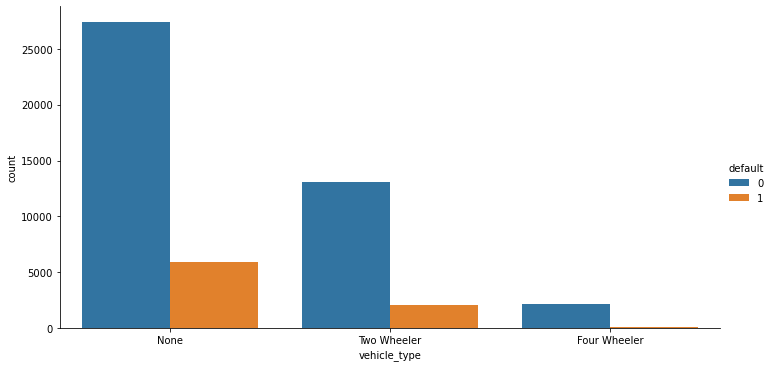

In [20]:
sns.catplot(x="vehicle_type",hue="default", kind="count", data=data,aspect=2)

<blockquote style="font-size:16px;color:maroon;">
    <ul type="none">
    <li>The number of people who own a four wheeler vehicle and who are defaulters are very less.</li>
    </ul>
</blockquote>

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Vehicle type counts</span>

In [21]:
vt = data['vehicle_type'].value_counts()
print("Vehicle type  :  Count")
print("---------------------------")
for i in range(len(vt)):
    print(vt.index[i],":",vt.values[i])

Vehicle type  :  Count
---------------------------
None : 33301
Two Wheeler : 15101
Four Wheeler : 2234


#### 4.1.11 Marital status

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Customers martial status</span>

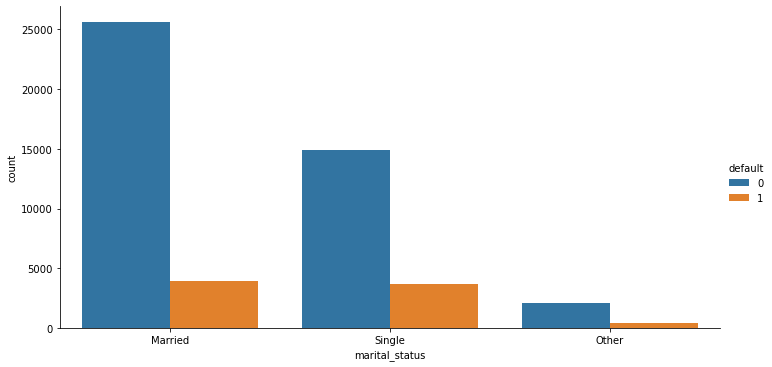

In [22]:
sns.catplot(x="marital_status",hue="default", kind="count", data=data,aspect=2)

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Martial status counts</span>

In [23]:
mt = data['marital_status'].value_counts()
print("Married status  :  Count")
print("---------------------------")
for i in range(len(mt)):
    print(mt.index[i],":",mt.values[i])

Married status  :  Count
---------------------------
Married : 29539
Single : 18576
Other : 2521


#### 4.1.12  number of cards

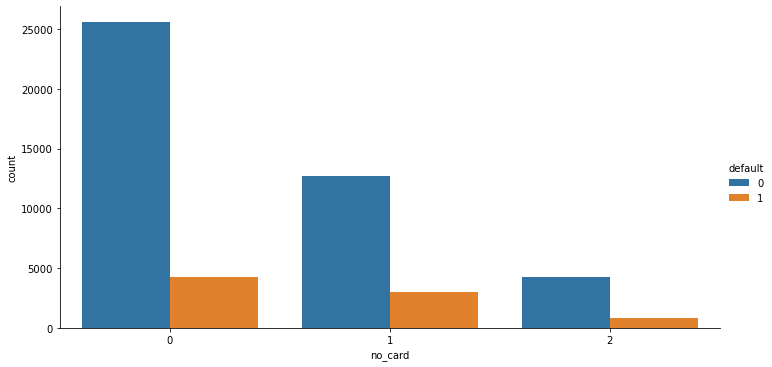

In [24]:
sns.catplot(x="no_card",hue="default", kind="count", data=data,aspect=2)

#### 4.2 Bivariate analysis

#### 4.2.1 Age v/s Gender

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Plotting Age v/s gender</span>

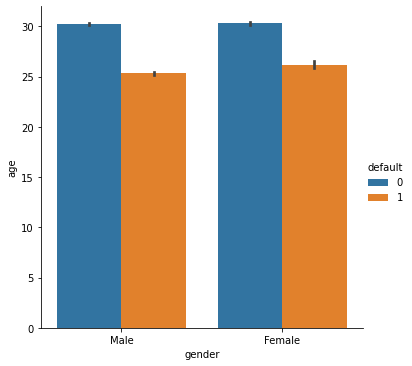

In [25]:
sns.catplot(x="gender", y="age",hue="default", kind="bar",data=data)

#### 4.2.2 Age v/s Occupation

<span style="font-size:15px;">&nbsp;&nbsp;&nbsp;&nbsp;Plotting Age v/s Occupation</span>

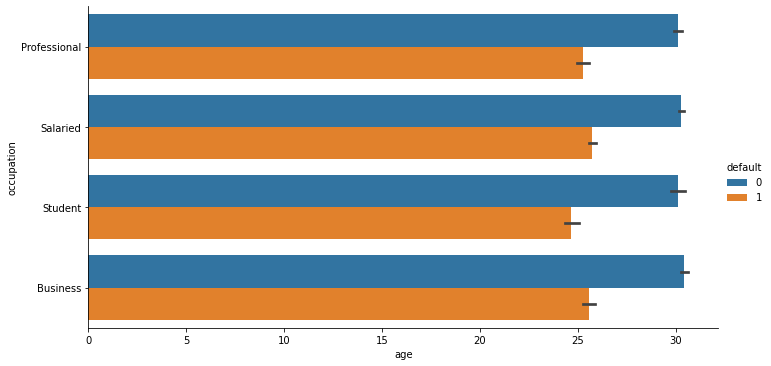

In [26]:
sns.catplot(x="age", y="occupation",hue="default",data=data,kind="bar",aspect=2)

#### 4.2.3 Other plots

<blockquote style="font-size:16px;color:red;">
    <ul type="none">
    <li>Other bivariate plots can be plotted similarly and based on the requirement.</li>
    </ul>
</blockquote>

#### 4.3 Analyzing the imbalance in the dataset

Points with class label -> 0 are =   84.15751639150012 %
Points with class label -> 1 are =   15.842483608499883 %


([<matplotlib.patches.Wedge at 0x1c530650f40>,
 [Text(-0.9715353121196196, 0.5158673640623465, '0'),
  Text(0.9715352879701245, -0.5158674095431959, '1')],
 [Text(-0.529928352065247, 0.2813821985794617, '84.5%'),
  Text(0.5299283388927951, -0.2813822233871977, '15.5%')])

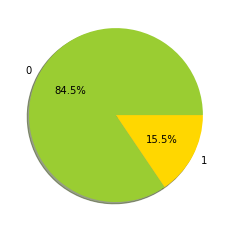

In [27]:
class_label = data['default'].value_counts()
total_points = len(data)
print("Points with class label -> 0 are =  ",class_label.values[0]/total_points*100,"%")
print("Points with class label -> 1 are =  ",class_label.values[1]/total_points*100,"%")
labels = ['0','1']
sizes = [84.15,15.48]
colors = ['yellowgreen', 'gold']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

<blockquote style="font-size:18px;color:blue;">
    <ul type="none">
    <li>The given dataset is imbalanced. Because there are 84% of points with class label '0' and just only ~16% of the points with the class label '1'.</li>
    </ul>
</blockquote>

### 5. Making necessary assumptions and changes

<blockquote style="font-size:16px;color:indigo;">
    <ul type="none">
    <li>As the data in here is imbalanced, the decision trees may not perform as well as expected.</li>
    <li>We can use undersampling or oversampling to avoid the above problem. Otherwise there is a possibility that we may overfit the training data which will result in high generalization error.</li>
        <li>In order to get a good accuracy and as well as "less generalization error" we could perform cross validation on various hyperparamaters.</li>
        <li>Alternatively we can use Randomforests with decision trees as base learners if we want to improve our models prediction accuracy.</li>
    </ul>
</blockquote>

### 6. Splitting the data into test,cv  and train data sets

<blockquote style="font-size:16px;color:#333;">
    <ul type="none">
    <li>If we train the model on the entire dataset we would not know how well is our model performing. And also how well the model generalizes to the unseen data.</li>
    <li>So we make a split of data into train and test sets. Then train the model on the train set and then evaluate the model on the test set.</li>
        <li>In this project we are choosing the raio of train:test split as 70% : 30%.</li>
    </ul>
</blockquote>

In [28]:
y = data['default']
x = data.drop(['default'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.3,stratify=y_train)
print("Dimensionality of X_train and y_train :")
print(x_train.values.shape ,y_train.values.shape)
print("Dimensionality of X_test and y_test :")
print(x_test.values.shape ,y_test.values.shape)
print("Dimensionality of X_cv and y_cv :")
print(x_cv.values.shape ,y_cv.values.shape)

Dimensionality of X_train and y_train :
(24811, 12) (24811,)
Dimensionality of X_test and y_test :
(15191, 12) (15191,)
Dimensionality of X_cv and y_cv :
(10634, 12) (10634,)


### 7. Data cleaning and pre processing

#### 7.1 Handling numerical features

#### 7.1.1 Scaling the annual_income attribute

<blockquote style="font-size:16px;color:#333;">
    <ul type="none">
    <li>In here to scale the numerical features we are using sklearn.preprocessing.StandarScaler.</li>
        <li>The sklearn library generally offers 3 methods fit(), transform() and fit_transform().</li>
        <li style="color:red;">And we need to be cautious and use fit() only on train data(i.e x_train) and then transform the x_train and x_test. We should never fit() on the test data. Because that would cause <span style="color:indigo;">"data leakage"</span></li>
        <li>For reference : https://datascience.stackexchange.com/questions/31232/why-not-use-scaler-fit-transform-on-total-dataframe</li>
    </ul>
</blockquote>

In [29]:
sc = StandardScaler()
sc.fit(x_train['annual_income'].values.reshape(-1,1))
temp = sc.transform(x_train['annual_income'].values.reshape(-1,1))
x_train['annual_income'] = deepcopy(temp)
temp = sc.transform(x_test['annual_income'].values.reshape(-1,1))
x_test['annual_income'] = deepcopy(temp)
temp = sc.transform(x_cv['annual_income'].values.reshape(-1,1))
x_cv['annual_income'] = deepcopy(temp)

#### 7.1.2 Scaling the disposable income

In [30]:
sc = StandardScaler()
sc.fit(x_train['disposable_income'].values.reshape(-1,1))
temp = sc.transform(x_train['disposable_income'].values.reshape(-1,1))
x_train['disposable_income'] = deepcopy(temp)
temp = sc.transform(x_test['disposable_income'].values.reshape(-1,1))
x_test['disposable_income'] = deepcopy(temp)
temp = sc.transform(x_cv['disposable_income'].values.reshape(-1,1))
x_cv['disposable_income'] = deepcopy(temp)

#### 7.2 Handling categorical features

#### 7.2.1 Encoding Gender attribute

In [31]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['gender'])
temp = label_encoder.transform(x_train['gender'])
x_train['gender'] = deepcopy(temp)
temp = label_encoder.transform(x_test['gender'])
x_test['gender'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['gender'])
x_cv['gender'] = deepcopy(temp)

#### 7.2.2 Encoding Education attribute

In [32]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['education'])
temp = label_encoder.transform(x_train['education'])
x_train['education'] = deepcopy(temp)
temp = label_encoder.transform(x_test['education'])
x_test['education'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['education'])
x_cv['education'] = deepcopy(temp)

#### 7.2.3 Encoding Occupation attribute

In [33]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['occupation'])
temp = label_encoder.transform(x_train['occupation'])
x_train['occupation'] = deepcopy(temp)
temp = label_encoder.transform(x_test['occupation'])
x_test['occupation'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['occupation'])
x_cv['occupation'] = deepcopy(temp)

#### 7.2.4 Encoding the organization type attribute

In [34]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['organization_type'])
temp = label_encoder.transform(x_train['organization_type'])
x_train['organization_type'] = deepcopy(temp)
temp = label_encoder.transform(x_test['organization_type'])
x_test['organization_type'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['organization_type'])
x_cv['organization_type'] = deepcopy(temp)

#### 7.2.5 Encoding the Senioriy attribute

In [35]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['seniority'])
temp = label_encoder.transform(x_train['seniority'])
x_train['seniority'] = deepcopy(temp)
temp = label_encoder.transform(x_test['seniority'])
x_test['seniority'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['seniority'])
x_cv['seniority'] = deepcopy(temp)

#### 7.2.6 Encoding the house type

In [36]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['house_type'])
temp = label_encoder.transform(x_train['house_type'])
x_train['house_type'] = deepcopy(temp)
temp = label_encoder.transform(x_test['house_type'])
x_test['house_type'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['house_type'])
x_cv['house_type'] = deepcopy(temp)

#### 7.2.7 Encoding the vehicle type

In [37]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['vehicle_type'])
temp = label_encoder.transform(x_train['vehicle_type'])
x_train['vehicle_type'] = deepcopy(temp)
temp = label_encoder.transform(x_test['vehicle_type'])
x_test['vehicle_type'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['vehicle_type'])
x_cv['vehicle_type'] = deepcopy(temp)

#### 7.2.8 Encoding the maritial status

In [38]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(x_train['marital_status'])
temp = label_encoder.transform(x_train['marital_status'])
x_train['marital_status'] = deepcopy(temp)
temp = label_encoder.transform(x_test['marital_status'])
x_test['marital_status'] = deepcopy(temp)
temp = label_encoder.transform(x_cv['marital_status'])
x_cv['marital_status'] = deepcopy(temp)

### 8. Finding the best parameters using the cross validation

#### 8.1 Performing the grid search cross validation

In [39]:
params = {'max_depth': np.arange(3, 10),'criterion' :['gini', 'entropy']}
dt = DecisionTreeClassifier()
best_model = GridSearchCV(dt, params)
best_model.fit(x_train,y_train)
y_pred_cv = best_model.predict_proba(x_cv)[:, 1]
auc_score = roc_auc_score(y_cv, y_pred_cv)

In [40]:
print("The AUC on cross validation set is :",auc_score)

The AUC on cross validation set is : 0.7785646192253963


#### 8.2 Getting the best hyperparameters

In [41]:
best_model.best_params_

{'criterion': 'entropy', 'max_depth': 5}

### 9. Training the model with best hyperparameters

In [42]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=6)
dt.fit(x_train,y_train)
y_pred_train = dt.predict_proba(x_train)[:,1]
y_pred_test = dt.predict_proba(x_test)[:,1]

### 10. Evaluating the performance of the model

#### 10.1 Finding the false positive rate , true positive rate , threshold of train and test data and plotting ROC

In [43]:
train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_pred_test)

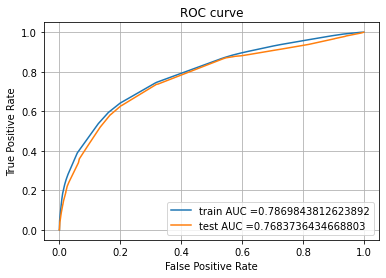

In [44]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(metrics.auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.grid()
plt.show()

<blockquote style="font-size:16px;color:#333;">
    <ul type="none">
    <li>The AUC of a random model(randomly predict 0 or 1 ) would be = 0.5.</li>
        <li>As our model`s AUC > 0.5 our model is performing well both on the train data as well as the test data.</li>
    </ul>
</blockquote>

#### 10.2 Accuracy of the model

In [45]:
print("Train accuracy is :",dt.score(x_train,y_train)*100)
print("Test accuracy is  :",dt.score(x_test,y_test)*100)
print("CV accuracy is  :",dt.score(x_cv,y_cv)*100)

Train accuracy is : 86.34073596388698
Test accuracy is  : 85.42558093608056
CV accuracy is  : 86.08237728042128


#### 10.3 confusion matrix

In [46]:
confusion_matrix_test = pd.DataFrame(confusion_matrix(y_test, dt.predict(x_test)),index=['0','1'],columns=['0','1'])
confusion_matrix_test.style.background_gradient(cmap='Blues')

,0,1
0,12519,265
1,1949,458


#### 10.4 Feature importance

In [47]:
fi = dt.feature_importances_
features = x_train.columns
fi_dict = dict(zip(features,fi))
fi_df = pd.DataFrame(fi_dict,index={0})
fi_df

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card
0,0.44105,0.011202,0.140484,0.008723,0.0,0.000171,0.006486,0.014403,0.329579,0.014611,0.033292,0.0


### 11. References

### 1. https://stackoverflow.com/questions/31161637/grid-search-cross-validation-in-sklearn <br>
### 2. https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe <br>
### 3. https://scikit-learn.org/stable/modules/model_evaluation.html